# Create a model for the repeat station network: Model 1

## Description
The model is based on the ideia that the data reduction process is going to be done using the current magnetic observatories in South America for the stations located in their coverage radius.
The problem is that not all stations are going to be inside of an observatory radius. Therefore, to solve this two solutions are proposed:
- The utilization of local variometers for the stations outside of the radius
- The construction of new magnetic observatories to create a beter geographical distribution

This model contains:
- Current available Intermagnet Observatories in South America
- The proposed new repeat stations network
- Proposed new observatories Tefe-AM, Pantanal-MT, Itacuruba-PE, and Sao Martinho da Serra-RS (Their placement is not definitive, they are here just to give an idea)

Networks inspiration:
- France
- Slovakia
- Vietnam

It is still possible to use other mathematical methods to remove the external effects like modeling through SECS (Croatia), interpolation for two observatories (Vietnam)
The reduction to annual means is still done using the obsvervatories.

In [1]:
# Import modules
import mestrado_module as mm
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
from folium import plugins
import seaborn as sns
from branca.element import Template, MacroElement

In [2]:
# Shapefile info for the static map
shapefile_folder: Path = Path(mm.path_south_america_shapefile)
shapefile_file: Path = Path(mm.south_america_shapefile)

# Magnetic Observatories
sa_obs_folder: Path = Path(mm.path_00_data_manual)
sa_obs_file: Path = Path("models_intermagnet_observatories_south_america.csv")

#Proposed magnetic observatories
prop_obs_folder: Path = Path(mm.path_00_data_manual)
prop_obs_file: Path = Path("models_proposed_observatories.csv")

# Selected repeat stations (folium file)
selected_rs_folder: Path = Path(mm.path_pipeline_07_select_rs_geo_distribution)
selected_rs_file: Path = Path(mm.output_7a_code_selected_rs_folium)

# Save figures and files
output_folder: Path = Path(mm.path_pipeline_08_model_one)

# Folium Maps
mapa0 = "../02_pipeline/08_rs_network_model_one/8_model_one_observatories_and_rs.html"

# Static maps
static_map_no_radius: Path = Path("8_model_one_observatories_and_rs_no_radius.png")

# Figure style
sns.set_style("darkgrid")

## Read the data

In [3]:
# REPEAT STATIONS
selected_rs = pd.read_csv(selected_rs_folder /selected_rs_file)

# this has to be removed, otherwise folium wont read the geometry correctly later for some reason
# Therefore is better to create the geometry everytime it is needed
selected_rs = selected_rs.drop(columns=["geometry"]) 

# Check info
selected_rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Code                      50 non-null     object 
 1   Lat_dd                    50 non-null     float64
 2   Lon_dd                    50 non-null     float64
 3   Alt_m                     50 non-null     float64
 4   Time_dy                   50 non-null     float64
 5   D_dd                      50 non-null     float64
 6   IGRF_D_dd                 50 non-null     float64
 7   I_dd                      50 non-null     float64
 8   IGRF_I_dd                 50 non-null     float64
 9   F_nT                      50 non-null     float64
 10  IGRF_F_nT                 50 non-null     float64
 11  H_nT                      50 non-null     float64
 12  IGRF_H_nT                 50 non-null     float64
 13  X_nT                      50 non-null     float64
 14  IGRF_X_nT   

In [4]:
# INTERMAGNET OBSERVATORIES IN SOUTH AMERICA
south_america_obs_df = pd.read_csv(sa_obs_folder / sa_obs_file)

# Check df info
south_america_obs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Code        6 non-null      object 
 1   Name        6 non-null      object 
 2   Lat_dd      6 non-null      float64
 3   Lon_dd      6 non-null      float64
 4   Altitude_m  6 non-null      int64  
 5   Country     6 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 416.0+ bytes


In [5]:
# PROPOSED OBSERVATORIES
prop_obs_df = pd.read_csv(prop_obs_folder / prop_obs_file)

# Check df info
prop_obs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Code        4 non-null      object 
 1   Name        4 non-null      object 
 2   Lat_dd      4 non-null      float64
 3   Lon_dd      4 non-null      float64
 4   Altitude_m  4 non-null      int64  
 5   Country     4 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 320.0+ bytes


## Create the geodataframe for the folium map

In [6]:
# REPEAT STATIONS
geometry_selected_rs = [Point(xy) for xy in zip(selected_rs["Lon_dd"], selected_rs["Lat_dd"])]

# Create the geodataframe (use the df_aux dataframe and create the geometry column)
gdf_selected_rs = gpd.GeoDataFrame(selected_rs, geometry = geometry_selected_rs)

# Check it
gdf_selected_rs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Code                      50 non-null     object  
 1   Lat_dd                    50 non-null     float64 
 2   Lon_dd                    50 non-null     float64 
 3   Alt_m                     50 non-null     float64 
 4   Time_dy                   50 non-null     float64 
 5   D_dd                      50 non-null     float64 
 6   IGRF_D_dd                 50 non-null     float64 
 7   I_dd                      50 non-null     float64 
 8   IGRF_I_dd                 50 non-null     float64 
 9   F_nT                      50 non-null     float64 
 10  IGRF_F_nT                 50 non-null     float64 
 11  H_nT                      50 non-null     float64 
 12  IGRF_H_nT                 50 non-null     float64 
 13  X_nT                      50 non-null     fl

In [7]:
# INTERMAGNET OBSERVATORIES IN SOUTH AMERICA
south_america_obs_geometry = [Point(xy) for xy in zip(south_america_obs_df["Lon_dd"], south_america_obs_df["Lat_dd"])]

# Create the geodataframe
gdf_south_america_obs = gpd.GeoDataFrame(south_america_obs_df, geometry = south_america_obs_geometry)
gdf_south_america_obs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Code        6 non-null      object  
 1   Name        6 non-null      object  
 2   Lat_dd      6 non-null      float64 
 3   Lon_dd      6 non-null      float64 
 4   Altitude_m  6 non-null      int64   
 5   Country     6 non-null      object  
 6   geometry    6 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 464.0+ bytes


In [8]:
# PROPOSED OBSERVATORIES
prop_obs_geometry = [Point(xy) for xy in zip(prop_obs_df["Lon_dd"], prop_obs_df["Lat_dd"])]

# Create the geodataframe
gdf_prop_obs = gpd.GeoDataFrame(prop_obs_df, geometry = prop_obs_geometry)
gdf_prop_obs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Code        4 non-null      object  
 1   Name        4 non-null      object  
 2   Lat_dd      4 non-null      float64 
 3   Lon_dd      4 non-null      float64 
 4   Altitude_m  4 non-null      int64   
 5   Country     4 non-null      object  
 6   geometry    4 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 352.0+ bytes


## Plot folium map

In [9]:
## DEFINITIONS (distances in km)
#observatory_coverage_radius = 904000 # BASED ON ITALY CASTELLO TESINO
#embracer_coverage_radius = 150000 # germany
#embracer_coverage_radius = 230000 # italy GIB station

# Radius suggested by Katia and Cristiano (800 km, 300 km)
observatory_coverage_radius_m = 800000
repeat_station_coverage_radius_m = 300000

# Color definitions
sa_obs_color = "darkblue"
prop_obs_color = "darkred"
selected_rs_color = "black"

# Custom icons for the repeat stations and observatories
icon_path_sa_obs = r"../00_data/manual/symbols_square_darkblue.png"
icon_path_prop_obs = r"../00_data/manual/symbols_square_darkred.png"
icon_path_rs = r"../00_data/manual/symbols_circle_black.png"

In [10]:
# INTERACTIVE MAP: Map of the Model 1, current observatories and proposed observatories

# Create the Interactive map using folium
tile_type0 = "OpenStreetMap"
map0 = folium.Map(location = [-15, -50], zoom_start = 5, tiles = tile_type0)

# Main group
fg0 = folium.FeatureGroup()    

# Group 1: Selected Repeat Stations
g01 = folium.plugins.FeatureGroupSubGroup(fg0, name = 'Repeat Stations, active radius', show = False)
for index, location_info in gdf_selected_rs.iterrows():
    folium.Marker(
        [location_info["Lat_dd"], location_info["Lon_dd"]],
#        icon = folium.Icon(color = selected_rs_color, icon ="circle", prefix = "fa"),
        icon = folium.features.CustomIcon(icon_path_rs, icon_size=(14, 14)),
        tooltip = [
            "Repeat_Station:",
            location_info["Code"],
            "Lat_dd:",
            location_info["Lat_dd"],
            "Lon_dd",
            location_info["Lon_dd"],
            "Local:",
            location_info["RS_name"],
            "Current closest brazilian observatory:",
            location_info["Closest_OBS"],
            "Number of occupations:",
            location_info["N_occupations"],
            "Last occupation time:",
            location_info["Time_dy"],
        ],
    ).add_to(g01)
# Add the repeat stations coverage    
for index, location_info in gdf_selected_rs.iterrows():    
    folium.Circle(
        [location_info["Lat_dd"], location_info["Lon_dd"]],
        radius = repeat_station_coverage_radius_m,
        color = selected_rs_color #,
        #fill_color = "green"    
    ).add_to(g01)


# Group 2: Selected Repeat Stations
g02 = folium.plugins.FeatureGroupSubGroup(fg0, name = 'Repeat Stations, inactive radius', show = True)
for index, location_info in gdf_selected_rs.iterrows():
    folium.Marker(
        [location_info["Lat_dd"], location_info["Lon_dd"]],
#        icon = folium.Icon(color = selected_rs_color, icon ="circle", prefix = "fa"),
        icon = folium.features.CustomIcon(icon_path_rs, icon_size=(14, 14)),
        tooltip = [
            "Repeat_Station:",
            location_info["Code"],
            "Lat_dd:",
            location_info["Lat_dd"],
            "Lon_dd",
            location_info["Lon_dd"],
            "Local:",
            location_info["RS_name"],
            "Current closest brazilian observatory:",
            location_info["Closest_OBS"],
            "Number of occupations:",
            location_info["N_occupations"],
            "Last occupation time:",
            location_info["Time_dy"],
        ],
    ).add_to(g02)    


# Group 3: Magnetic Observatories in South America
g03 = folium.plugins.FeatureGroupSubGroup(fg0, name = 'Magnetic Observatories in South America', show = True)
for index, location_info in gdf_south_america_obs.iterrows():
    folium.Marker(
        [location_info["Lat_dd"], location_info["Lon_dd"]],
#        icon = folium.Icon(color = sa_obs_color, icon ="square", prefix = "fa"),
        icon = folium.features.CustomIcon(icon_path_sa_obs, icon_size=(14, 14)),
        tooltip = [
            "Observatory:",
            location_info["Name"],
            "Lat_dd:",
            location_info["Lat_dd"],
            "Lon_dd",
            location_info["Lon_dd"],
            "Local:",
            location_info["Country"]
        ],
    ).add_to(g03)
# Add the observatory coverage    
for index, location_info in gdf_south_america_obs.iterrows():    
    folium.Circle(
        [location_info["Lat_dd"], location_info["Lon_dd"]],
        radius = observatory_coverage_radius_m,
        color = sa_obs_color,
        fill_color = sa_obs_color
    ).add_to(g03)
        

# Group 4: Proposed Magnetic Observatories
g04 = folium.plugins.FeatureGroupSubGroup(fg0, name = 'Proposed Magnetic Observatories', show = False)
for index, location_info in gdf_prop_obs.iterrows():
    folium.Marker(
        [location_info["Lat_dd"], location_info["Lon_dd"]],
#        icon = folium.Icon(color = sa_obs_color, icon ="square", prefix = "fa"),
        icon = folium.features.CustomIcon(icon_path_prop_obs, icon_size=(14, 14)),
        tooltip = [
            "Observatory:",
            location_info["Name"],
            "Lat_dd:",
            location_info["Lat_dd"],
            "Lon_dd",
            location_info["Lon_dd"],
            "Local:",
            location_info["Country"]
        ],
    ).add_to(g04)
# Add the observatory coverage    
for index, location_info in gdf_prop_obs.iterrows():    
    folium.Circle(
        [location_info["Lat_dd"], location_info["Lon_dd"]],
        radius = observatory_coverage_radius_m,
        color = prop_obs_color,
        fill_color = prop_obs_color
    ).add_to(g04)
        

# Add the subgroups to the main map
map0.add_child(fg0)
map0.add_child(g01)
map0.add_child(g02)
map0.add_child(g03)
map0.add_child(g04)

# Add other layers to the map
folium.TileLayer('Stamen Terrain').add_to(map0)
folium.TileLayer('Stamen Toner').add_to(map0)
#folium.TileLayer('Stamen Water Color').add_to(map0)
folium.TileLayer('cartodbpositron').add_to(map0)
#folium.TileLayer('cartodbdark_matter').add_to(map0)

# Add the layer control
folium.LayerControl().add_to(map0)

# Add altitude and longitude tool map
lat_lon_vis0 = folium.LatLngPopup()
map0.add_child(lat_lon_vis0)

# Measurement control
measure_control0 = plugins.MeasureControl(position = "topleft", 
                                         active_color = "red", 
                                         completed_color = "red", 
                                         primary_length_unit = "kilometers")
map0.add_child(measure_control0)

# Add the full screen button
fullscreen_button0 = plugins.Fullscreen(position ='topright', title ='Expand me',
                                title_cancel ='Exit me',
                                force_separate_button = True)
map0.add_child(fullscreen_button0)

# Add a mini map
minimap0 = plugins.MiniMap()
map0.add_child(minimap0)

# Draw tools
# export=True exports the drawn shapes as a geojson file
draw0 = plugins.Draw(export=True)
map0.add_child(draw0)


# ADD LEGEND TO THE MAP
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Model 1: Magnetic observatories and Repeat Stations</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:black;opacity:0.7;'></span>Repeat Stations</li>
    <li><span style='background:darkblue;opacity:0.7;'></span>Magnetic Observatories</li>
    <li><span style='background:darkred;opacity:0.7;'></span>Proposed Magnetic Observatories</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)
map0.get_root().add_child(macro)


# Save map
map0.save(mapa0)

## Static map

In [11]:
# Read South america shapefile
gdf_south_america = gpd.read_file(shapefile_folder / shapefile_file)

# Check info
gdf_south_america.info()

# Check coordinates
gdf_south_america.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   15 non-null     object  
 1   geometry  15 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 368.0+ bytes


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# Define plot variables

# Figure size (figsize=(f1, f2))
f1 = 10
f2 = 10

# Plot
sa_color = "lightgrey"
sa_edge_color = "black"
station_symbol_plot = "o"
station_symbol_plot_color = "black"
station_size = 10
obs_symbol_plot = "s"
obs_symbol_plot_color = "darkblue"
prop_obs_symbol_plot_color = "darkred"
obs_size = 30
leg_loc = "best"
alpha_value = 1

# Fontsize
title_size = 16
xlabel_size = 14
ylabel_size = 14
dpi_value = 300
bbox_inches_value = "tight"

In [13]:
# Set gdfs for the same coordinate system as the shapefile
new_gdf_selected_rs = gdf_selected_rs
new_gdf_selected_rs.set_crs(epsg=4326,inplace=True)

new_gdf_south_america_obs = gdf_south_america_obs
new_gdf_south_america_obs.set_crs(epsg=4326,inplace=True)

new_gdf_prop_obs = gdf_prop_obs
new_gdf_prop_obs.set_crs(epsg=4326,inplace=True)

,Code,Name,Lat_dd,Lon_dd,Altitude_m,Country,geometry
0,TFE,Tefe,-3.33,-64.70,28,Brazil,POINT (-64.70000 -3.33000)
1,PNL,Pantanal,-16.68,-56.18,80,Brazil,POINT (-56.18000 -16.68000)
2,ITA,Itacuruba,-8.81,-38.69,305,Brazil,POINT (-38.69000 -8.81000)
3,SMS,Sao Martinho da Serra,-29.44,-53.82,462,Brazil,POINT (-53.82000 -29.44000)


In [14]:
# Legend
blue_square = mlines.Line2D([], [], marker = obs_symbol_plot, color = obs_symbol_plot_color, linestyle = 'None',
                          markersize = 6, label = 'Magnetic Observatory')
red_square = mlines.Line2D([], [], marker = obs_symbol_plot, color = prop_obs_symbol_plot_color, linestyle = 'None',
                          markersize = 6, label = 'Proposed Magnetic Observatory')
black_circle = mlines.Line2D([], [], marker = station_symbol_plot, color = station_symbol_plot_color, linestyle='None',
                          markersize=6, label='Repeat Station')

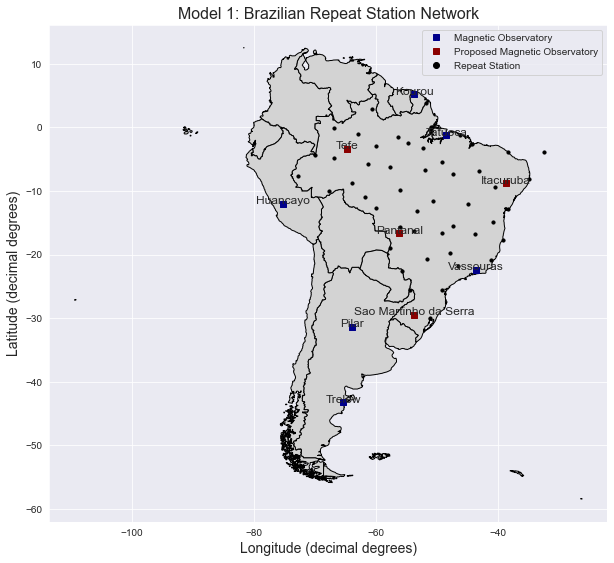

In [15]:
# FIGURE 1: NO ACTIVE COVERAGE RADIUS
# Create the figure
fig, ax = plt.subplots(figsize=(f1, f2))
#set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect("equal")

# Plot
gdf_south_america.plot(ax = ax, color = sa_color, edgecolor = sa_edge_color)
new_gdf_selected_rs.plot(ax = ax, marker = station_symbol_plot, color = station_symbol_plot_color, markersize = station_size, alpha = alpha_value)
new_gdf_south_america_obs.plot(ax = ax, marker = obs_symbol_plot, color = obs_symbol_plot_color, markersize = obs_size, alpha = alpha_value)
new_gdf_prop_obs.plot(ax = ax, marker = obs_symbol_plot, color = prop_obs_symbol_plot_color, markersize = obs_size, alpha = alpha_value)
ax.legend(handles = [blue_square, red_square, black_circle], loc = leg_loc)

# Annotate the names into the figure
new_gdf_south_america_obs.apply(lambda x: ax.annotate(text=x.Name, xy=x.geometry.centroid.coords[0], ha='center', size=12), axis = 1);
new_gdf_prop_obs.apply(lambda x: ax.annotate(text=x.Name, xy=x.geometry.centroid.coords[0], ha='center', size=12), axis = 1);
#new_gdf_selected_rs.apply(lambda x: ax.annotate(text=x.Code, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

# Details
ax.set_title("Model 1: Brazilian Repeat Station Network", fontsize = title_size)
ax.set_xlabel("Longitude (decimal degrees)", fontsize = xlabel_size)
ax.set_ylabel("Latitude (decimal degrees)", fontsize = ylabel_size)
plt.savefig(output_folder / static_map_no_radius, dpi = 300, bbox_inches = bbox_inches_value)
plt.show()
#plt.close()